In [0]:
# Data Processing and Cleaning
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

#Miscellaneous
from tqdm import tqdm_notebook

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:

#((pd.DataFrame(train.isnull().sum()).T)/len(train))*100
#print(pd.DataFrame(test.isnull().sum()).T )

"""
train:
7 feats with no genre
8 with no overview
156 without prod com
2 without runtime
276 witout kewrods
13 without cast
16 without crew

test:
16 genre
14 overview
258 prod coms
4 runtime
393 keywords
13 cast
22 crew
"""

pd.DataFrame(test.budget.value_counts()).T


,0,20000000,25000000,15000000,10000000,30000000,40000000,5000000,35000000,50000000,6000000,12000000,3000000,60000000,18000000,4000000,2000000,8000000,70000000,45000000,7000000,1000000,80000000,11000000,14000000,17000000,3500000,9000000,2500000,75000000,22000000,150000000,13000000,55000000,28000000,100000000,16000000,19000000,24000000,6500000,...,9272437,10700000,1103000,17700000,15774948,176000003,4357373,243000,6600000,923000,1920000,27563396,325000,2280000,620000,30250000,1750000,2224000,22500000,26350000,450,139000000,26500000,36500000,16000,103000,58800000,13800000,103000000,707503,439000,5600000,8256269,14800000,8000,947000,390000,2479000,11097000,291000
budget,1211,116,104,100,94,91,73,72,70,68,68,64,61,54,54,54,51,46,46,44,43,42,38,36,36,36,34,33,33,32,32,31,31,31,30,27,27,24,23,22,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000      
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1865,'revenue'] = 25000000      
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

In [0]:
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

In [0]:
train['revenue'] = np.log1p(train['revenue'])


In [0]:
rf_cols = ['budget', 'status', 'homepage','original_language', 'release_date', 'runtime', 'revenue']
rf_train = train[rf_cols].copy()
rf_cols.remove('revenue')
rf_test = test[rf_cols].copy()

In [0]:
median_budget = rf_train[rf_train['budget'] > 0]['budget'].median()
def fill_budget(df, median_budget):
    df['budget_is_median'] = 0
    df.loc[df.budget == 0, 'budget_is_median'] = 1
    df.loc[df.budget == 0, 'budget'] = median_budget
    return df

rf_train = fill_budget(rf_train, median_budget)
rf_test = fill_budget(rf_test, median_budget)

In [0]:
rf_combined = pd.concat([rf_train, rf_test], sort=False)
le = LabelEncoder()
le.fit(rf_combined['original_language'])
rf_train['original_language'] = le.transform(rf_train['original_language'])
rf_test['original_language'] = le.transform(rf_test['original_language'])

In [0]:
rf_test.loc[rf_test['status'].isnull() == True, 'status'] = 'Released'
rf_combined.loc[rf_combined['status'].isnull() == True, 'status'] = 'Released'
le = LabelEncoder()
le.fit(rf_combined['status'])
rf_train['status'] = le.transform(rf_train['status'])
rf_test['status'] = le.transform(rf_test['status'])

In [0]:
rf_train.loc[rf_train['homepage'].isnull() == True, 'homepage'] = 0
rf_train.loc[rf_train['homepage'].isnull() == False, 'homepage'] = 1

rf_test.loc[rf_test['homepage'].isnull() == True, 'homepage'] = 0
rf_test.loc[rf_test['homepage'].isnull() == False, 'homepage'] = 1


In [0]:
median_runtime = rf_train['runtime'].median()
def fill_runtime(df, median_runtime):
    df['runtime_is_median'] = 0
    df.loc[df.runtime == 0, 'runtime_is_median'] = 1
    df.loc[df.runtime.isnull() == True, 'runtime_is_median'] = 1
    df.loc[df.runtime == 0, 'runtime'] = median_runtime
    df.loc[df.runtime.isnull() == True, 'runtime'] = median_runtime
    return df

rf_train = fill_runtime(rf_train, median_runtime)
rf_test = fill_runtime(rf_test, median_runtime)

In [0]:
from datetime import timedelta, date

In [0]:
rf_test.loc[rf_test['release_date'].isnull() == True, 'release_date'] = '10/19/2001'
test.loc[test['release_date'].isnull() == True, 'release_date'] = '10/19/2001'
def add_date_features(df, col, prefix):
    df[col] = pd.to_datetime(df[col])
    future = df[col] > pd.Timestamp(year=2017,month=12,day=31)
    df.loc[future, col] -= timedelta(days=365.25*100)
    
    df[prefix+'_day_of_week'] = df[col].dt.dayofweek
    df[prefix+'_day_of_year'] = df[col].dt.dayofyear
    df[prefix+'_month'] = df[col].dt.month
    df[prefix+'_year'] = df[col].dt.year
    df[prefix+'_day'] = df[col].dt.day
    # df[prefix+'_is_year_end'] = df[col].dt.is_year_end
    # df[prefix+'_is_year_start'] = df[col].dt.is_year_start
    df[prefix+'_week'] = df[col].dt.week
    # df[prefix+'_quarter'] = df[col].dt.quarter    
    
    df.drop(col, axis = 1, inplace = True)

    return df

rf_train = add_date_features(rf_train, 'release_date', 'release')
rf_test = add_date_features(rf_test, 'release_date', 'release')

In [0]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

json_cols = ['production_companies', 'production_countries', 'Keywords', 'belongs_to_collection']
for col in json_cols:
    rf_train[col] = train[col]
    rf_train[col] = rf_train[col].apply(lambda x: get_dictionary(x))
    rf_test[col] = test[col]
    rf_test[col] = rf_test[col].apply(lambda x: get_dictionary(x))

In [0]:
for col in json_cols:
    # Get name of collection movie belongs to
    if col == 'belongs_to_collection':
        rf_train['collection_name'] = rf_train[col].apply(lambda row: row[0]['name'] if row != {} else '0')
        rf_test['collection_name'] = rf_test[col].apply(lambda row: row[0]['name'] if row != {} else '0')
        rf_combined = pd.concat([rf_train, rf_test], sort=False)
        le = LabelEncoder()
        le.fit(rf_combined['collection_name'])
        rf_train['collection_name'] = le.transform(rf_train['collection_name'])
        rf_test['collection_name'] = le.transform(rf_test['collection_name'])    
    
    # Size of feature
    rf_train[col] = rf_train[col].apply(lambda row: 0 if row is None else len(row))
    rf_test[col] = rf_test[col].apply(lambda row: 0 if row is None else len(row))

# # Word count for overview
# rf_train['overview_wordcount'] = rf_train['overview'].str.split().str.len()
# rf_train.drop('overview', axis = 1, inplace = True)
# rf_train.loc[rf_train['overview_wordcount'].isnull() == True, 'overview_wordcount'] = 0

# rf_test['overview_wordcount'] = rf_test['overview'].str.split().str.len()
# rf_test.drop('overview', axis = 1, inplace = True)
# rf_test.loc[rf_test['overview_wordcount'].isnull() == True, 'overview_wordcount'] = 0

# Feature Interactions
rf_train['_budget_runtime_ratio'] = np.round(rf_train['budget']/rf_train['runtime'], 2)
rf_train['_budget_year_ratio'] = np.round(rf_train['budget']/(rf_train['release_year']*rf_train['release_year']), 2)

rf_test['_budget_runtime_ratio'] = np.round(rf_test['budget']/rf_test['runtime'], 2)
rf_test['_budget_year_ratio'] = np.round(rf_test['budget']/(rf_test['release_year']*rf_test['release_year']), 2)


In [17]:
rf_train.head()

,budget,status,homepage,original_language,runtime,revenue,budget_is_median,runtime_is_median,release_day_of_week,release_day_of_year,release_month,release_year,release_day,release_week,production_companies,production_countries,Keywords,belongs_to_collection,collection_name,_budget_runtime_ratio,_budget_year_ratio
0,14000000.0,1,1,10,93.0,16.326300,0,0,4,51,2,2015,20,8,3,1,4,1,282,150537.63,3.45
1,40000000.0,1,1,10,113.0,18.370959,0,0,4,219,8,2004,6,32,1,1,4,1,641,353982.30,9.96
2,3300000.0,1,1,10,105.0,16.387512,0,0,4,283,10,2014,10,41,3,1,12,0,1,31428.57,0.81
3,1200000.0,1,1,16,122.0,16.588099,0,0,4,69,3,2012,9,10,0,1,7,0,1,9836.07,0.30
4,16000000.0,1,1,24,118.0,15.182615,1,0,3,36,2,2009,5,6,0,1,0,0,1,135593.22,3.96


In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(
    rf_train.drop('revenue', axis = 1), rf_train['revenue'], 
    test_size=0.1, 
    random_state=42
)

def rmse(y_pred, y_true):
    return np.sqrt(mean_squared_error(y_pred, y_true))

def print_rf_score(model):
    print(f'Train R2:   {model.score(X_train, y_train)}')
    print(f'Valid R2:   {model.score(X_valid, y_valid)}')
    print(f'Train RMSE: {rmse(model.predict(X_train), y_train)}')
    print(f'Valid RMSE: {rmse(model.predict(X_valid), y_valid)}')


In [19]:
rf = RandomForestRegressor(n_jobs = -1, oob_score = True, random_state = 42)
rf.fit(X_train, y_train)
print_rf_score(rf)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Train R2:   0.9163206234694452
Valid R2:   0.5318257934082076
Train RMSE: 0.8808092582665443
Valid RMSE: 2.003890056606805


In [20]:
rf.oob_score_

0.11563075578688398

In [21]:
rf = RandomForestRegressor(
    n_estimators = 20, 
    n_jobs = -1, 
    oob_score = True, 
    random_state = 42
)
rf.fit(X_train, y_train)
print_rf_score(rf)
print(f'OOB Score:  {rf.oob_score_}')

Train R2:   0.931118652096101
Valid R2:   0.5192007170408431
Train RMSE: 0.7991411081593509
Valid RMSE: 2.0307293905308867
OOB Score:  0.49674005639653185


In [22]:
rf = RandomForestRegressor(
    n_estimators = 20, 
    min_samples_leaf = 4, 
    max_features = 0.3, 
    n_jobs = -1, 
    oob_score = True, 
    random_state = 42
)
rf.fit(X_train, y_train)
print_rf_score(rf)
print(f'OOB Score:  {rf.oob_score_}')

Train R2:   0.7802014694735809
Valid R2:   0.5442741724954188
Train RMSE: 1.427529347448806
Valid RMSE: 1.977069652287526
OOB Score:  0.5263367376912207


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
No handles with labels found to put in legend.


Text(0.5, 1.0, 'OOB Scores')

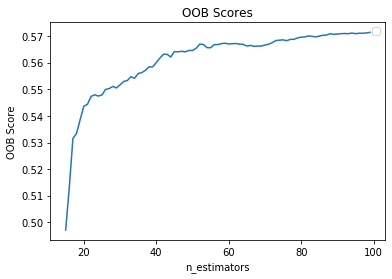

In [23]:
scores = []
valid = []
train = []
for est in range(15,100):
  rf = RandomForestRegressor(
      n_estimators=est,
      min_samples_leaf = 4,
      max_features = 0.4,
      oob_score = True,
      random_state = 42)
  rf.fit(X_train, y_train)
  train.append(rmse(rf.predict(X_train), y_train))
  valid.append(rmse(rf.predict(X_valid), y_valid))
  scores.append(rf.oob_score_)
plt.plot(range(15,100), scores)
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('OOB Score')
plt.title('OOB Scores')

Text(0.5, 1.0, 'Training RMSLE')

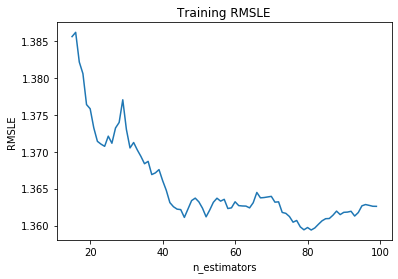

In [24]:
plt.plot(range(15,100), train)
plt.xlabel("n_estimators")
plt.ylabel("RMSLE")
plt.title("Training RMSLE")

Text(0.5, 1.0, 'Validation RMSLE')

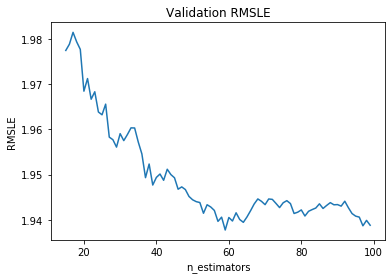

In [25]:
plt.plot(range(15,100), valid)
plt.xlabel("n_estimators")
plt.ylabel("RMSLE")
plt.title("Validation RMSLE")

In [26]:
rf = RandomForestRegressor(
      n_estimators= 55,
      min_samples_leaf = 5,
      max_features = 0.3,
      oob_score = True,
      random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=55,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [27]:
print_rf_score(rf)
rf.oob_score_

Train R2:   0.7603470593620207
Valid R2:   0.5725499670319167
Train RMSE: 1.4906100128766768
Valid RMSE: 1.914753297692793


0.5661572977696719

In [0]:
predictions = np.expm1(rf.predict(rf_test))
submission['revenue'] = np.round(predictions)
submission.to_csv('submission_simple_rf.csv', index = False)


In [0]:
# np.expm1(rf.predict(X_valid))[0:20]
# submission['pred'] = np.round(np.expm1(rf.predict(X_valid)))
# submission['actual'] = y_valid

In [30]:
np.expm1(y_valid)

1801     9247881.0
1190           7.0
1817       33700.0
251     10017322.0
2505     8910819.0
           ...    
2497    41954997.0
787       253527.0
2636    67918658.0
2538    15000000.0
402         8251.0
Name: revenue, Length: 300, dtype: float64

In [0]:
def xgtrain(X_train, X_valid, y_train, y_valid):
    regressor = XGBRegressor(
        n_estimators = 50000, 
        learning_rate = 0.001,
        max_depth = 6, 
        subsample = 0.3, 
        colsample_bytree = 0.2
        )
    
    regressor_ = regressor.fit(
        X_train.values, y_train.values, 
        eval_metric = 'rmse', 
        eval_set = [
            (X_train.values, y_train.values), 
            (X_valid.values, y_valid.values)
        ],
        verbose = 1000,
        early_stopping_rounds = 500,
        )
    
    return regressor_

In [32]:
regressor_ = xgtrain(X_train, X_valid, y_train, y_valid)


[01:55:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:15.7199	validation_1-rmse:16.0408
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 500 rounds.
[1000]	validation_0-rmse:6.19609	validation_1-rmse:6.36504
[2000]	validation_0-rmse:2.96817	validation_1-rmse:3.06732
[3000]	validation_0-rmse:2.05797	validation_1-rmse:2.16061
[4000]	validation_0-rmse:1.82079	validation_1-rmse:1.9589
[5000]	validation_0-rmse:1.72779	validation_1-rmse:1.90872
[6000]	validation_0-rmse:1.66687	validation_1-rmse:1.89246
[7000]	validation_0-rmse:1.61538	validation_1-rmse:1.88367
[8000]	validation_0-rmse:1.56913	validation_1-rmse:1.88008
[9000]	validation_0-rmse:1.5279	validation_1-rmse:1.87611
[10000]	validation_0-rmse:1.48748	validation_1-rmse:1.87241
[11000]	validation_0-rmse:1.4505	validation_1-rmse:1.8715
Stopping. 

In [0]:
predictions = np.expm1(regressor_.predict(rf_test.values))
submission['revenue'] = np.round(predictions)
submission.to_csv('submission_simple_rf.csv', index = False)

In [0]:
predictions = np.expm1(regressor_.predict(rf_test.values)) + np.expm1(rf.predict(rf_test))
predictions /= 2
submission['revenue'] = np.round(predictions)
submission.to_csv('submission_simple_rf.csv', index = False)